In [1]:
from olfactorybulb.database import *
import os,sys
from neuronunit.tests.olfactory_bulb.publications import *
from neuronunit.tests.olfactory_bulb.tests import *
from neuronunit.models.neuron_cell import NeuronCellModel
from sciunit.suites import TestSuite
from pandas import DataFrame
import quantities as pq
from neuronunit.tests.olfactory_bulb.utilities import cache
from linetimer import CodeTimer
import string

/home/justas/anaconda2/envs/p27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Could not load NEURONBackend


In [2]:
cell_type = 'mc'

# Load tests
measurements = Measurement\
    .select(Measurement)\
    .join(Property)\
    .switch(Measurement)\
    .join(Source)\
    .where((Measurement.property.type == "Electrophysiology") & (Measurement.property.id.startswith(cell_type+'_')))\
    .order_by(Measurement.property.id)

tests = []

for m in measurements:
    t = str(m.property.test_class_generic)
    pub = str(m.source.publication_class).strip()
    class_name = t+pub
    
    globals()[class_name] = type(class_name, 
                                 (eval(pub), eval(t)), 
                                 {})
    
    print('creating specific test class: ' + class_name)
    
    tests.append(eval(class_name)(observation={"mean": m.mean * eval(m.property.units), "std": m.std * eval(m.property.units), "n": m.n}))
    
    
# Load model classes
model_classes = list(CellModel\
                    .select(CellModel)\
                    .where(CellModel.cell_type == cell_type.upper())             
                     )
for i, m in enumerate(model_classes):
    nmsp = string.join(m.isolated_model_class.split('.')[:-1],'.')
    cls = m.isolated_model_class.split('.')[-1]

    import_cmd = 'from '+nmsp+' import '+cls+' as Model'+str(i)
    print(import_cmd)
    exec(import_cmd)
    
# Create work item list
work_items = []

for model in model_classes:
    work_items.append({"model_class": model.isolated_model_class })
        
def dowork(item):
    results = []
    
    import prev_ob_models
    exec('cell = '+ str(item["model_class"]) +'()')

    model = NeuronCellModel(cell.soma(0.5),name=cell.__class__.__module__+'.'+cell.__class__.__name__)


    for test in tests:
        try:
            print('Starting', item, test)
            result = test.generate_prediction(model)
            print('Finished', item, test, result)

        except:
            import traceback
            result = traceback.format_exc()
            print(result)

        results.append(result)

    return item["model_class"], results


creating specific test class: AfterHyperpolarizationAmplitudeTestYu2015
creating specific test class: AfterHyperpolarizationAmplitudeTestBurtonUrban2014
creating specific test class: AfterHyperpolarizationTimeTestYu2015
creating specific test class: AfterHyperpolarizationTimeTestBurtonUrban2014
creating specific test class: SpikeAmplitudeTestYu2015
creating specific test class: SpikeAmplitudeTestBurtonUrban2014
creating specific test class: SpikeHalfWidthTestYu2015
creating specific test class: SpikeHalfWidthTestBurtonUrban2014
creating specific test class: SpikePeakTestYu2015
creating specific test class: SpikeThresholdTestYu2015
creating specific test class: SpikeThresholdTestBurtonUrban2014
creating specific test class: CellCapacitanceTestYu2015
creating specific test class: CellCapacitanceTestBurtonUrban2014
creating specific test class: FISlopeTestBurtonUrban2014
creating specific test class: InputResistanceTestYu2015
creating specific test class: InputResistanceTestBurtonUrban201

In [3]:
cache.clear()

	1 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	0 
	1 
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.AfterHyperpolarizationAmplitudeTestYu2015 object at 0x7f07696c2550>)


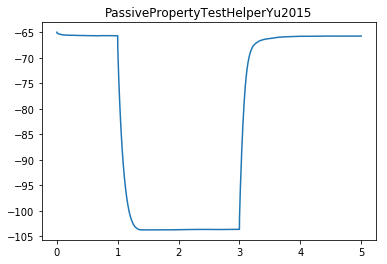

Code block 'PassivePropertyTestHelperYu2015' took: 4590.70205688 ms


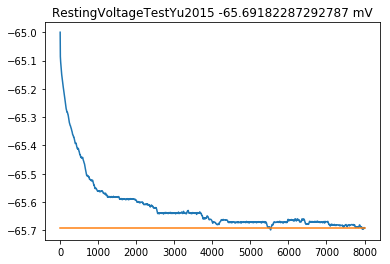

Code block 'RestingVoltageTestYu2015' took: 4946.86293602 ms


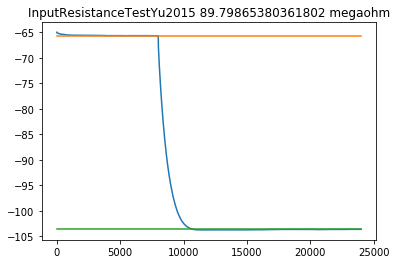

Code block 'InputResistanceTestYu2015' took: 370.584011078 ms


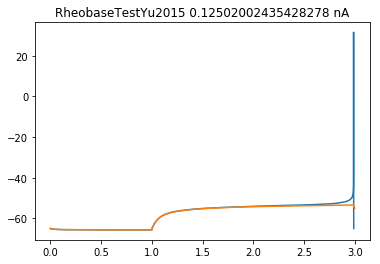

Code block 'RheobaseTestYu2015' took: 32136.5439892 ms


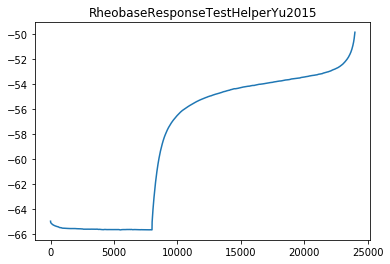

Code block 'RheobaseResponseTestHelperYu2015' took: 33841.5400982 ms


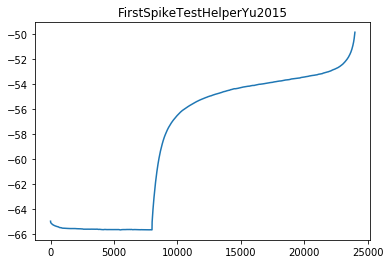

Code block 'FirstSpikeTestHelperYu2015' took: 34201.4567852 ms
Code block 'AfterHyperpolarizationAmplitudeTestYu2015' took: 34415.542841 ms
Traceback (most recent call last):
  File "<ipython-input-2-5a4f31e6b4c3>", line 51, in dowork
    result = test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_prediction_nocache(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/tests.py", line 536, in generate_prediction_nocache
    ap = self.get_dependent_prediction(FirstSpikeTestHelper, model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 94, in get_dependent_prediction
    return dependent_test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result 

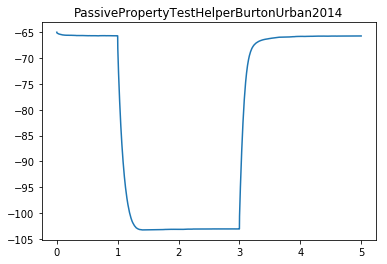

Code block 'PassivePropertyTestHelperBurtonUrban2014' took: 4852.07390785 ms


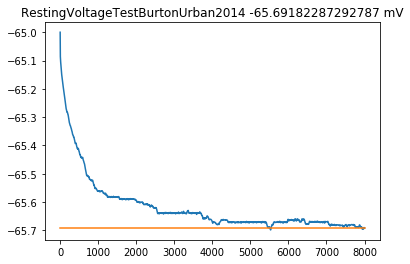

Code block 'RestingVoltageTestBurtonUrban2014' took: 5347.19610214 ms


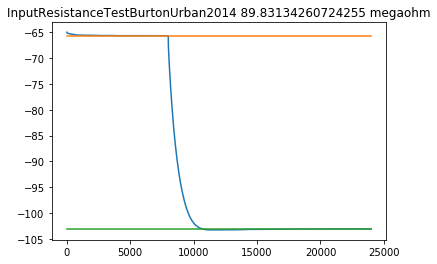

Code block 'InputResistanceTestBurtonUrban2014' took: 393.8331604 ms


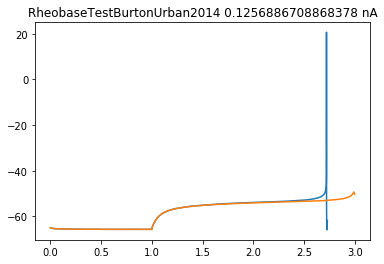

Code block 'RheobaseTestBurtonUrban2014' took: 34663.5308266 ms


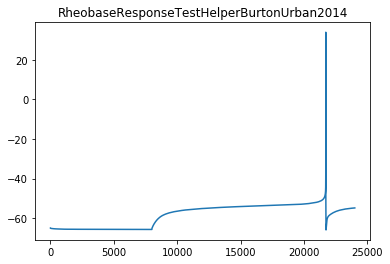

Code block 'RheobaseResponseTestHelperBurtonUrban2014' took: 36413.9919281 ms


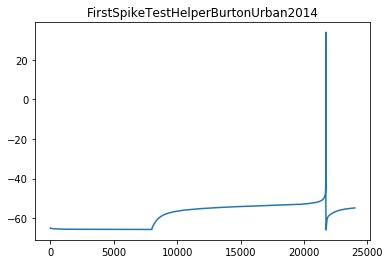

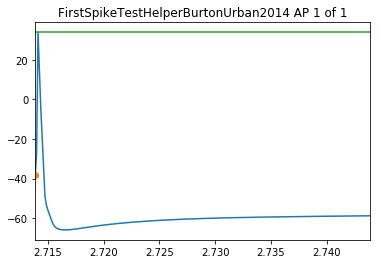

Code block 'FirstSpikeTestHelperBurtonUrban2014' took: 37020.4679966 ms


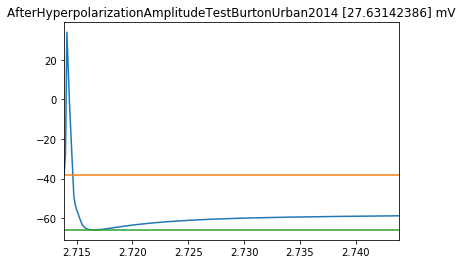

Code block 'AfterHyperpolarizationAmplitudeTestBurtonUrban2014' took: 37382.0900917 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.AfterHyperpolarizationAmplitudeTestBurtonUrban2014 object at 0x7f07695c0cd0>, array([27.63142386]) * mV)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.AfterHyperpolarizationTimeTestYu2015 object at 0x7f07696c2e10>)


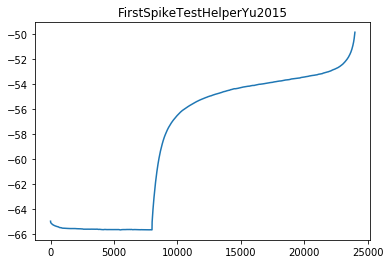

Code block 'FirstSpikeTestHelperYu2015' took: 334.52796936 ms
Code block 'AfterHyperpolarizationTimeTestYu2015' took: 338.589906693 ms
Traceback (most recent call last):
  File "<ipython-input-2-5a4f31e6b4c3>", line 51, in dowork
    result = test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_prediction_nocache(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/tests.py", line 566, in generate_prediction_nocache
    ap = self.get_dependent_prediction(FirstSpikeTestHelper, model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 94, in get_dependent_prediction
    return dependent_test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = sel

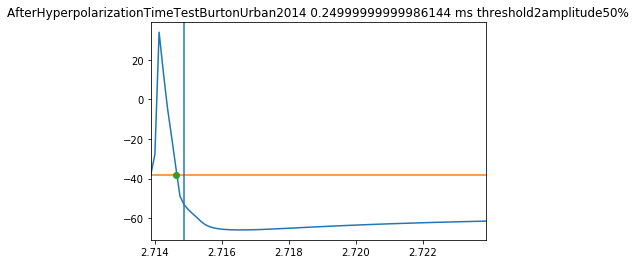

Code block 'AfterHyperpolarizationTimeTestBurtonUrban2014' took: 321.355819702 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.AfterHyperpolarizationTimeTestBurtonUrban2014 object at 0x7f07695c0fd0>, array(0.25) * ms)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAmplitudeTestYu2015 object at 0x7f07696eb4d0>)


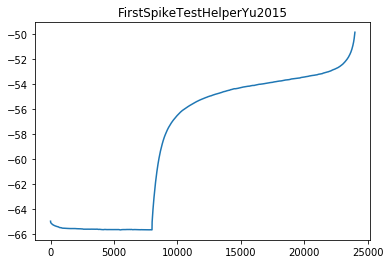

Code block 'FirstSpikeTestHelperYu2015' took: 315.395116806 ms
Code block 'SpikeAmplitudeTestYu2015' took: 319.198131561 ms
Traceback (most recent call last):
  File "<ipython-input-2-5a4f31e6b4c3>", line 51, in dowork
    result = test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_prediction_nocache(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/tests.py", line 366, in generate_prediction_nocache
    ap = self.get_dependent_prediction(FirstSpikeTestHelper, model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 94, in get_dependent_prediction
    return dependent_test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_

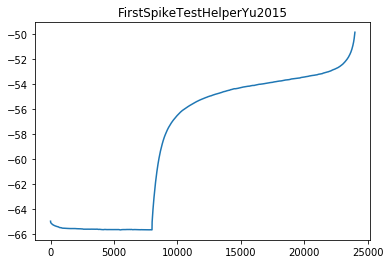

Code block 'FirstSpikeTestHelperYu2015' took: 373.277902603 ms
Code block 'SpikeHalfWidthTestYu2015' took: 379.786014557 ms
Traceback (most recent call last):
  File "<ipython-input-2-5a4f31e6b4c3>", line 51, in dowork
    result = test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_prediction_nocache(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/tests.py", line 377, in generate_prediction_nocache
    ap = self.get_dependent_prediction(FirstSpikeTestHelper, model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 94, in get_dependent_prediction
    return dependent_test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_

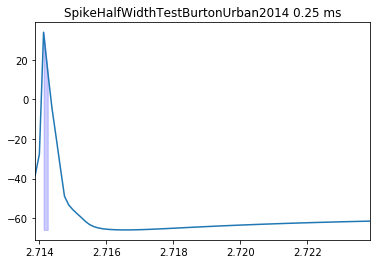

Code block 'SpikeHalfWidthTestBurtonUrban2014' took: 310.36901474 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeHalfWidthTestBurtonUrban2014 object at 0x7f07696ebc50>, array(0.25) * ms)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikePeakTestYu2015 object at 0x7f07c8b9c150>)


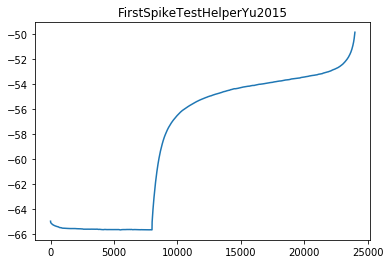

Code block 'FirstSpikeTestHelperYu2015' took: 343.586921692 ms
Code block 'SpikePeakTestYu2015' took: 355.171918869 ms
Traceback (most recent call last):
  File "<ipython-input-2-5a4f31e6b4c3>", line 51, in dowork
    result = test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_prediction_nocache(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/tests.py", line 355, in generate_prediction_nocache
    ap = self.get_dependent_prediction(FirstSpikeTestHelper, model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 94, in get_dependent_prediction
    return dependent_test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_predi

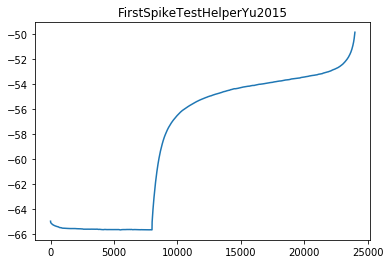

Code block 'FirstSpikeTestHelperYu2015' took: 362.536907196 ms
Code block 'SpikeThresholdTestYu2015' took: 366.274118423 ms
Traceback (most recent call last):
  File "<ipython-input-2-5a4f31e6b4c3>", line 51, in dowork
    result = test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_prediction_nocache(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/tests.py", line 344, in generate_prediction_nocache
    ap = self.get_dependent_prediction(FirstSpikeTestHelper, model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 94, in get_dependent_prediction
    return dependent_test.generate_prediction(model)
  File "/home/justas/Repositories/neuronunit_justasb/neuronunit/tests/olfactory_bulb/__init__.py", line 28, in generate_prediction
    result = self.generate_

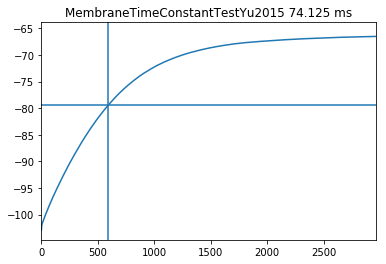

Code block 'MembraneTimeConstantTestYu2015' took: 312.448978424 ms
Code block 'CellCapacitanceTestYu2015' took: 322.101831436 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.CellCapacitanceTestYu2015 object at 0x7f07696eb1d0>, array(825.45780878) * pF)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.CellCapacitanceTestBurtonUrban2014 object at 0x7f07696c2a90>)


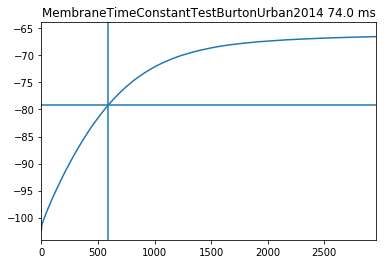

Code block 'MembraneTimeConstantTestBurtonUrban2014' took: 315.604925156 ms
Code block 'CellCapacitanceTestBurtonUrban2014' took: 325.195074081 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.CellCapacitanceTestBurtonUrban2014 object at 0x7f07696c2a90>, array(823.76593572) * pF)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.FISlopeTestBurtonUrban2014 object at 0x7f0769689410>)
Code block 'FISlopeTestBurtonUrban2014' took: 8485.35585403 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.FISlopeTestBurtonUrban2014 object at 0x7f0769689410>, array(80.) * Hz/nA)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestYu2015 object at 0x7f0769689710>)
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestYu2015 object at 0x7f0769689710>, array(89.7986538) * meg

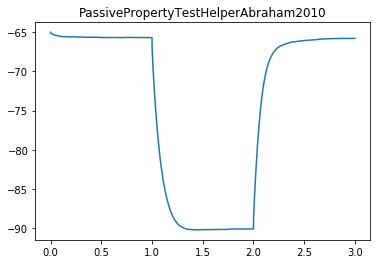

Code block 'PassivePropertyTestHelperAbraham2010' took: 2767.88496971 ms


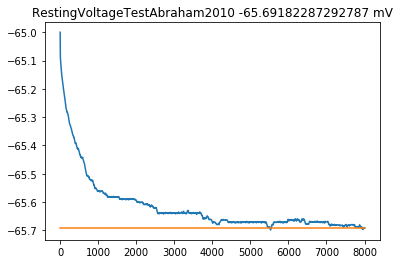

Code block 'RestingVoltageTestAbraham2010' took: 3163.8739109 ms


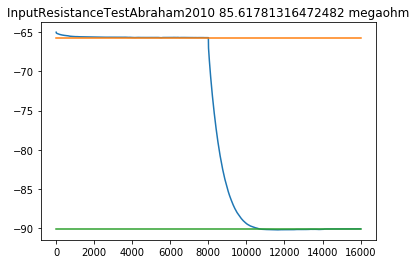

Code block 'InputResistanceTestAbraham2010' took: 3505.25093079 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestAbraham2010 object at 0x7f07696eb650>, array(85.61781316) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestHovis2010 object at 0x7f07696eb290>)


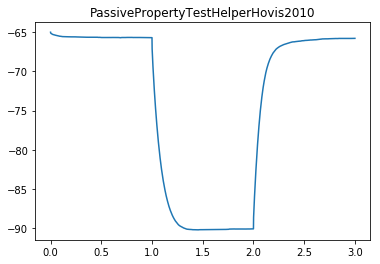

Code block 'PassivePropertyTestHelperHovis2010' took: 2830.13606071 ms


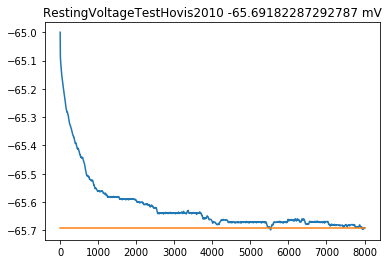

Code block 'RestingVoltageTestHovis2010' took: 3212.36300468 ms


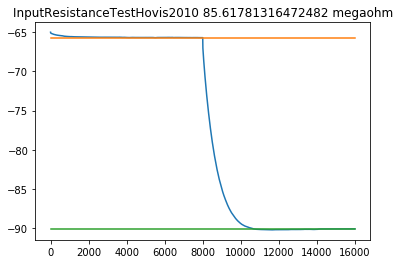

Code block 'InputResistanceTestHovis2010' took: 3554.49795723 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestHovis2010 object at 0x7f07696eb290>, array(85.61781316) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestShpak2012 object at 0x7f0769689590>)


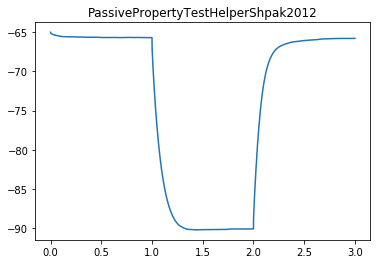

Code block 'PassivePropertyTestHelperShpak2012' took: 2753.6418438 ms


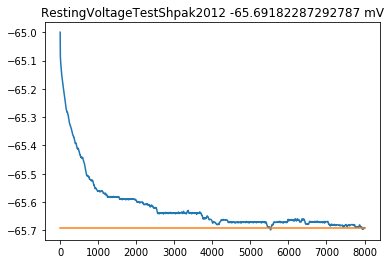

Code block 'RestingVoltageTestShpak2012' took: 3139.36781883 ms


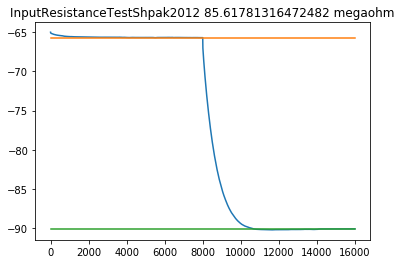

Code block 'InputResistanceTestShpak2012' took: 3493.66784096 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestShpak2012 object at 0x7f0769689590>, array(85.61781316) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestZibman2011 object at 0x7f0769689090>)


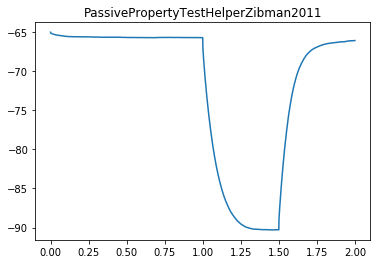

Code block 'PassivePropertyTestHelperZibman2011' took: 2083.70685577 ms


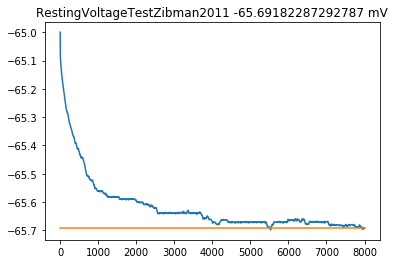

Code block 'RestingVoltageTestZibman2011' took: 2452.03304291 ms


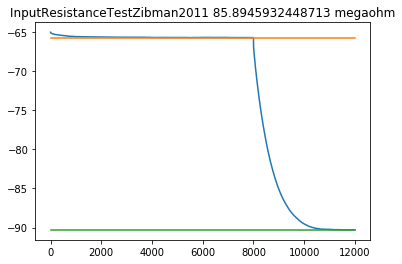

Code block 'InputResistanceTestZibman2011' took: 2765.07520676 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestZibman2011 object at 0x7f0769689090>, array(85.89459324) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestChristie2005 object at 0x7f0769689d10>)


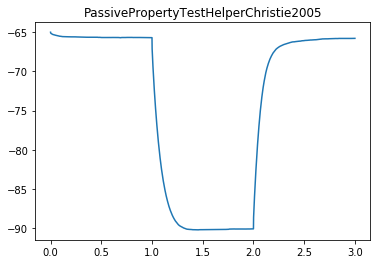

Code block 'PassivePropertyTestHelperChristie2005' took: 2803.26318741 ms


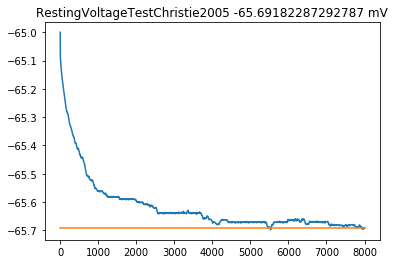

Code block 'RestingVoltageTestChristie2005' took: 3204.82301712 ms


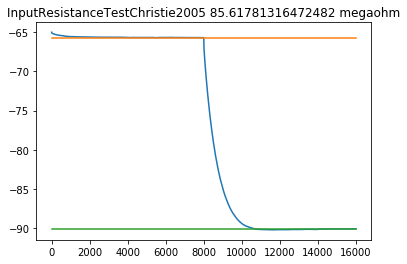

Code block 'InputResistanceTestChristie2005' took: 3528.98788452 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestChristie2005 object at 0x7f0769689d10>, array(85.61781316) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestFukunaga2012 object at 0x7f07696a30d0>)


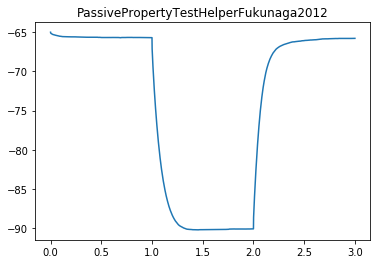

Code block 'PassivePropertyTestHelperFukunaga2012' took: 2745.17512321 ms


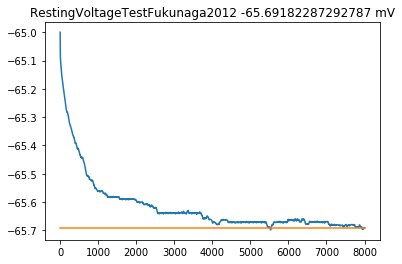

Code block 'RestingVoltageTestFukunaga2012' took: 3108.59704018 ms


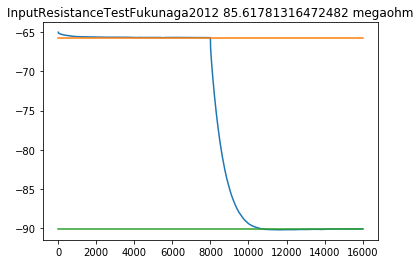

Code block 'InputResistanceTestFukunaga2012' took: 3529.50501442 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.InputResistanceTestFukunaga2012 object at 0x7f07696a30d0>, array(85.61781316) * megaohm)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.ISICVTestYu2015 object at 0x7f0769689e10>)


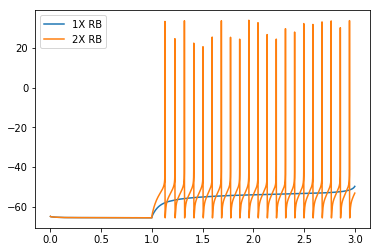

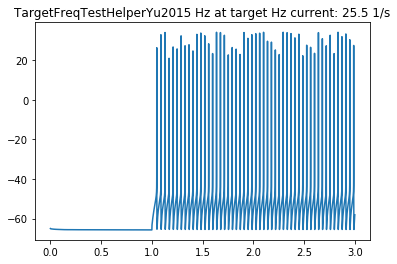

Code block 'TargetFreqTestHelperYu2015' took: 3745.60379982 ms


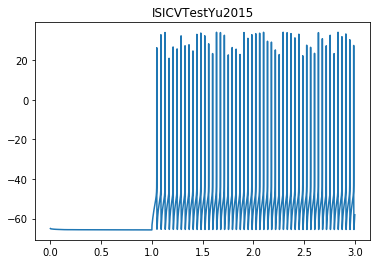

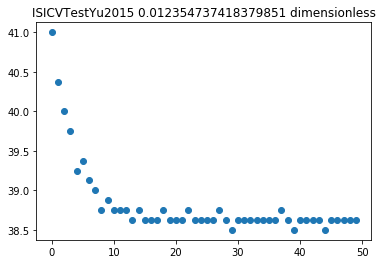

Code block 'ISICVTestYu2015' took: 4342.91481972 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.ISICVTestYu2015 object at 0x7f0769689e10>, array(0.01235474) * dimensionless)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.ISICVTestBurtonUrban2014 object at 0x7f0769689cd0>)


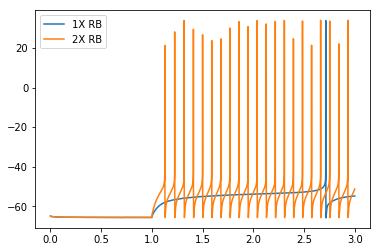

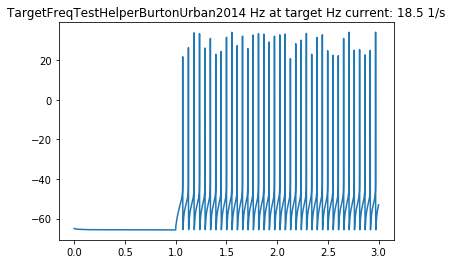

Code block 'TargetFreqTestHelperBurtonUrban2014' took: 4227.05793381 ms


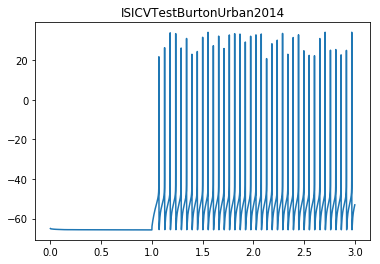

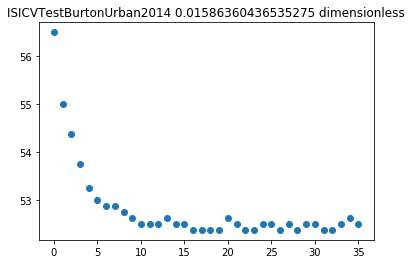

Code block 'ISICVTestBurtonUrban2014' took: 4880.33390045 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.ISICVTestBurtonUrban2014 object at 0x7f0769689cd0>, array(0.0158636) * dimensionless)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.ReboundSpikingTestBurtonUrban2014 object at 0x7f0769689310>)


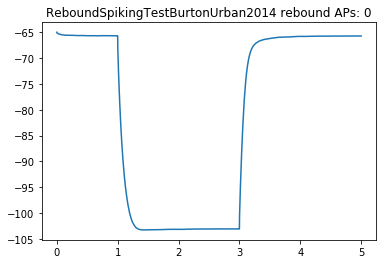

Code block 'ReboundSpikingTestBurtonUrban2014' took: 338.412046432 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.ReboundSpikingTestBurtonUrban2014 object at 0x7f0769689310>, False)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.ReboundSpikingTestJohnsonDelaney2010 object at 0x7f07696eb910>)


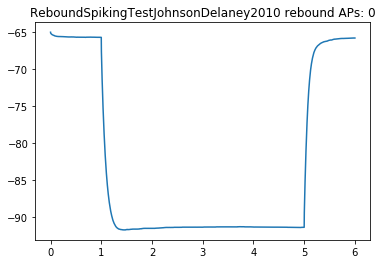

Code block 'ReboundSpikingTestJohnsonDelaney2010' took: 3233.0198288 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.ReboundSpikingTestJohnsonDelaney2010 object at 0x7f07696eb910>, False)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.RestingVoltageTestYu2015 object at 0x7f07696a3590>)
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.RestingVoltageTestYu2015 object at 0x7f07696a3590>, array(-65.69182287) * mV)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.RestingVoltageTestBurtonUrban2014 object at 0x7f07696a3610>)
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.RestingVoltageTestBurtonUrban2014 object at 0x7f07696a3610>, array(-65.69182287) * mV)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.RestingVoltageTestAbraham2010 object at 0x7f0

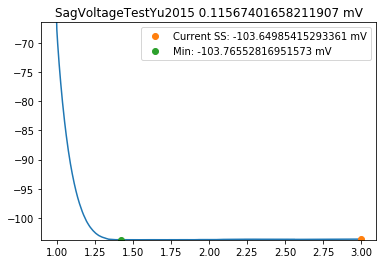

Code block 'SagVoltageTestYu2015' took: 424.459934235 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SagVoltageTestYu2015 object at 0x7f07696a3d50>, array(0.11567402) * mV)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SagVoltageTestBurtonUrban2014 object at 0x7f07696a3810>)


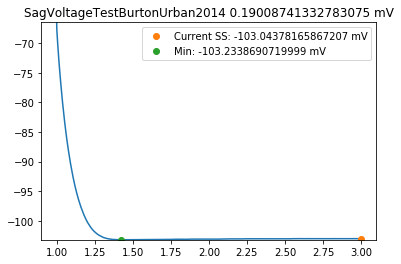

Code block 'SagVoltageTestBurtonUrban2014' took: 391.350984573 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SagVoltageTestBurtonUrban2014 object at 0x7f07696a3810>, array(0.19008741) * mV)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SagVoltageTestAngelo2012 object at 0x7f07696a3790>)


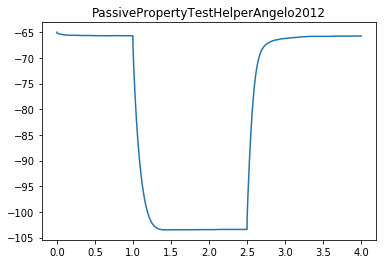

Code block 'PassivePropertyTestHelperAngelo2012' took: 3874.96805191 ms


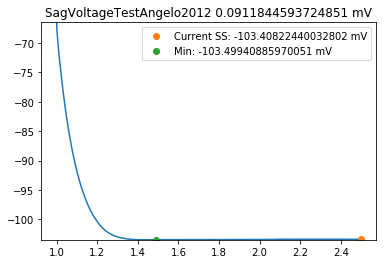

Code block 'SagVoltageTestAngelo2012' took: 4315.51384926 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SagVoltageTestAngelo2012 object at 0x7f07696a3790>, array(0.09118446) * mV)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SagVoltageTestHu2016 object at 0x7f07696b9110>)


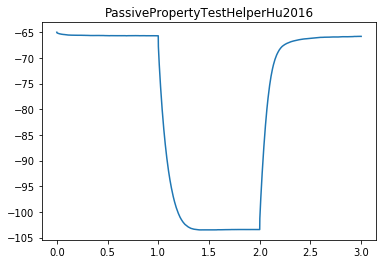

Code block 'PassivePropertyTestHelperHu2016' took: 3170.63593864 ms


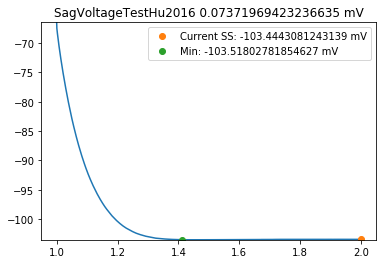

Code block 'SagVoltageTestHu2016' took: 3570.28508186 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SagVoltageTestHu2016 object at 0x7f07696b9110>, array(0.07371969) * mV)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAccommodationTestBurtonUrban2014 object at 0x7f07696b9310>)


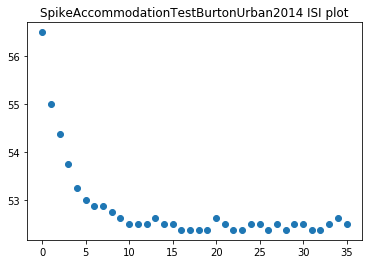

Code block 'SpikeAccommodationTestBurtonUrban2014' took: 304.00800705 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAccommodationTestBurtonUrban2014 object at 0x7f07696b9310>, array(1.348504) * Hz)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAccommodationTestZibman2011 object at 0x7f07696a3350>)


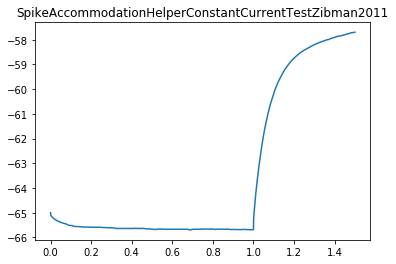

Code block 'SpikeAccommodationHelperConstantCurrentTestZibman2011' took: 1280.9650898 ms


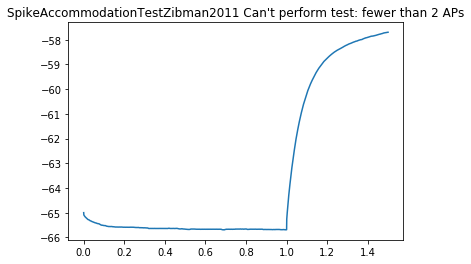

Code block 'SpikeAccommodationTestZibman2011' took: 1681.52499199 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAccommodationTestZibman2011 object at 0x7f07696a3350>, array(0.) * Hz)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAccommodationTimeConstantTestBurtonUrban2014 object at 0x7f07696a3850>)
[[Model]]
    Model(ifr_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 36
    # variables        = 3
    chi-square         = 0.02967924
    reduced chi-square = 8.9937e-04
    Akaike info crit   = -249.629746
    Bayesian info crit = -244.879189
[[Variables]]
    start:   17.7175102 +/- 0.02651581 (0.15%) (init = 17.69912)
    finish:  19.0627650 +/- 0.00602621 (0.03%) (init = 19.04762)
    tau:     147.723579 +/- 5.34325209 (3.62%) (init = 10)
[[Correlations]] (unreported correlations are < 0.100)
    C(start, tau)    =  0.558
 

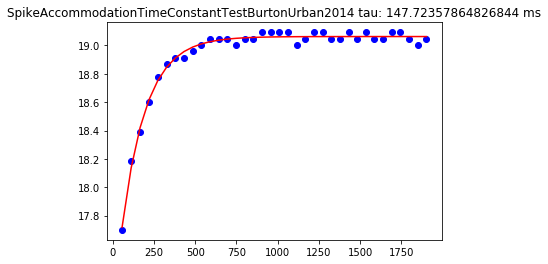

Code block 'SpikeAccommodationTimeConstantTestBurtonUrban2014' took: 445.10602951 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAccommodationTimeConstantTestBurtonUrban2014 object at 0x7f07696a3850>, array(147.72357865) * ms)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAccommodationTimeConstantTestZibman2011 object at 0x7f07696c2e90>)
Code block 'SpikeAccommodationTimeConstantTestZibman2011' took: 3.3061504364 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.SpikeAccommodationTimeConstantTestZibman2011 object at 0x7f07696c2e90>, array(500.) * ms)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestYu2015 object at 0x7f07696b9850>)
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestYu2015 object at 0x7f07696b9850>, array(74.

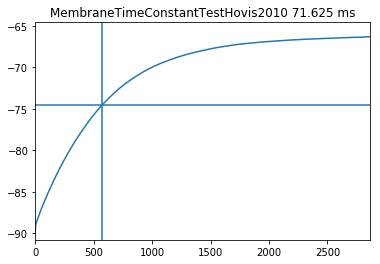

Code block 'MembraneTimeConstantTestHovis2010' took: 335.069179535 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestHovis2010 object at 0x7f07696b9950>, array(71.625) * ms)
('Starting', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestZibman2011 object at 0x7f07696b92d0>)


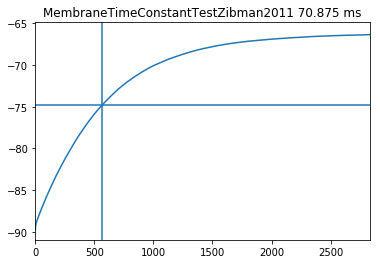

Code block 'MembraneTimeConstantTestZibman2011' took: 286.842107773 ms
('Finished', {'model_class': u'prev_ob_models.Davison2000.isolated_cells.MC'}, <__main__.MembraneTimeConstantTestZibman2011 object at 0x7f07696b92d0>, array(70.875) * ms)
FINISHED


In [4]:
i = 3
for item in [work_items[i]]:
    dowork(item)

print("FINISHED")

In [5]:
raise Exception()

Exception: 

In [ ]:
# Run the tests
processes = 15   
from multiprocessing import Pool
pool = Pool(processes = processes, maxtasksperchild=1)
result = pool.map(dowork, work_items)
pool.terminate()
pool.join()
result

# Show result in a table
df = []
for model in result:
    row = {"model": model[0]}
    for t, test in enumerate(tests):
        row[test.__class__.__name__] = model[1][t]
    df.append(row)
        
df = DataFrame(df)
df


In [ ]:
df

In [ ]:
raise Exception()

In [ ]:
#cache.clear()
import prev_ob_models
cell = prev_ob_models.Oconnor2012.isolated_cells.MC2()
model = NeuronCellModel(cell.soma(0.5),name=cell.__class__.__module__+'.'+cell.__class__.__name__)
AfterHyperpolarizationTimeTestBurtonUrban2014().generate_prediction(model)

In [ ]:
model = None
cell = None
raise Exception()

In [ ]:
for i, test in enumerate(tests):
    #print(i, 'judging', test)
    print(test.generate_prediction(model))
    

In [ ]:
test.observation

In [ ]:
with CodeTimer():
    TestSuite(tests).judge(model)

In [ ]:
from neuronunit.tests.olfactory_bulb.utilities import cache
#cache.clear()

In [ ]:

class Test(BurtonUrban2015, SpikeThresholdTest):
    pass

test = Test().generate_prediction(model)

In [ ]:
test

In [ ]:
#rb = RheobaseTestBurtonUrban2014().generate_prediction(model)
rb = 0.02438785 * pq.nA

In [ ]:
SpikeAccommodationTimeConstantTestZibman2011(rb).generate_prediction(model)

In [ ]:
SpikeAccommodationTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
ISICVTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
rb = RheobaseTestYu2015().generate_prediction(model)

In [ ]:
ISICVTestYu2015(rb).generate_prediction(model)

In [ ]:
0/0

In [ ]:
ReboundSpikingTestBurtonUrban2014().generate_prediction(model)

In [ ]:
ReboundSpikingTestJohnsonDelaney2010().generate_prediction(model)

In [ ]:
rb = RheobaseTestBurtonUrban2014().generate_prediction(model)
rb

In [ ]:
voltage = model.inject_square_current({"delay": 1000*pq.ms,"duration": 2000*pq.ms, "amplitude": rb})

In [ ]:
plt.plot(voltage)

In [ ]:
voltage.magnitude[np.where(voltage.times > 1000*pq.ms)]

In [ ]:
rb = 0.02438782 * pq.nA

In [ ]:
# %matplotlib notebook
# %matplotlib notebook
# %matplotlib notebook
# %matplotlib notebook

In [ ]:
rb = RheobaseTestYu2015().generate_prediction(model)
rb

In [ ]:
SagVoltageTestAngelo2012().generate_prediction(model)
SagVoltageTestBurtonUrban2014().generate_prediction(model)
SagVoltageTestYu2015().generate_prediction(model)
SagVoltageTestHu2016().generate_prediction(model)

In [ ]:
AfterHyperpolarizationAmplitudeTestYu2015(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationTimeTestYu2015(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationAmplitudeTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
AfterHyperpolarizationTimeTestBurtonUrban2014(rb).generate_prediction(model)

In [ ]:
1/0

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

v = aps[0]
plt.plot(v["voltage"])
#plt.plot(v3_z[0:get_zero_crossings(v3_z)[0]+1])
#plt.xlim((0,80))
plt.show()

In [ ]:
test1 = SagVoltageTestAngelo2012(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test2 = SagVoltageTestBurtonUrban2014(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test3 = SagVoltageTestYu2015(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})
test4 = SagVoltageTestHu2016(observation={"mean":0*pq.mV, 'std':1*pq.mV,'n': 10})

#suite = test1 
suite = TestSuite(tests=[test1,test2,test3,test4])

In [ ]:
suite.judge(model)